# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? - <B>Yes. We can see a bell curve. Mean(98.2) and median(98.3) are almost equal and total percentage of records(69%) within the two standard deviations is almost 68%.</B>
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent? - <B> It's large as sample size&gt;30. Yes. They are independent</B>
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F? - <B>Yes. The mean is 98.6 degress fahrenheit.</B>
    <ul>
    <li> Would you use a one-sample or two-sample test? Why? - <B>One sample test as we are testing for a single population and not for two different populations.</B>
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic?  - <B> t statistic as the population standard deviation is unknown.</B>
    <li> Now try using the other test. How is the result be different? Why? - <B>We cant proceed with the z test as the population standard deviation is unknown.</B>
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? - <B> The differnce is negligible. t test as the sample size &lt; 30. </B> 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    <B>Use z test for sample size greater than 30 else use t tests.</B>
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"? - <B>96.8&lt;abnormal temprature&lt;99.7</B>
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature? - <B>Yes</B>
    <ul>
    <li> What test did you use and why? - <B> 2 sample t test as there 2 sub populations male and female and the sample size was more than 30 and the standard deviation was unknown.</B>
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
from scipy import stats

df = pd.read_csv('data/human_body_temperature.csv')

###1. Is the distribution of body temperatures normal? - Yes. We can see a bell curve. Mean(98.2) and median(98.3) are almost equal and total percentage of records(69%) within the two standard deviations is almost 68%.

In [22]:
#Total percentage of records within the two std deviations.
df.loc[(df['temperature']>=(df['temperature'].mean()-df['temperature'].std())) & (df['temperature']<(df['temperature'].mean()+df['temperature'].std()))].temperature.count()/df['temperature'].count()*100

69.230769230769226

In [23]:
#Mean and median

print(df['temperature'].mean(), df['temperature'].median())

98.24923076923078 98.3


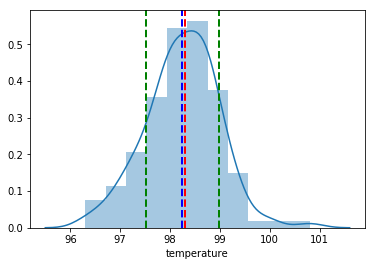

In [24]:
# Your work here.
#plt.hist(df['temperature'], bins=11, normed=True)
sns.distplot(df['temperature'], bins=11)
plt.axvline(df['temperature'].mean(), color='b', linestyle='dashed', linewidth=2, label='mean')
plt.axvline(df['temperature'].median(), color='r', linestyle='dashed', linewidth=2, label='median')
plt.axvline(df['temperature'].mean()+df['temperature'].std(), color='g', linestyle='dashed', linewidth=2, label='std')
plt.axvline(df['temperature'].mean()-df['temperature'].std(), color='g', linestyle='dashed', linewidth=2, label='std')
plt.show()

###2.Is the sample size large? Are the observations independent? There are 130 records in total. Since it is &gt; 30 its a large dataset. Yes observations are independent as rows do not depend on each other.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


###Performing one sample t-test as the population standard deviation is unknown.
Null hypothesis - Mean value is 98.6
Alternate hypothesis - Mean value is not 98.6
Observation : The p value(2.41) &gt; 0.05. So, we fail to reject the null hypothesis. So the population mean is 98.6

In [74]:
#Using scipy.
stats.ttest_1samp(df['temperature'].values, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

###4.one sample z test and t test with sample size 10.

Conclusion: The results obtained from z-test and t-test are similar.

In [80]:
#z-test
z_score = (df.sample(10, random_state=8).temperature.mean() - 98.6)*math.sqrt(10)/df.temperature.std()

p_value = stats.norm.sf(abs(z_score))*2

print("z_score : "+str(z_score), "p_value : "+str(p_value))

z_score : -1.8114936257171574 p_value : 0.070064474888


In [77]:
#t-test
stats.ttest_1samp(df.sample(10, random_state=8).temperature.values, 98.6)

Ttest_1sampResult(statistic=-3.4216903135393739, pvalue=0.0076075619143717568)

###5.For 95% confidence level the critical value is 1.96. Below is the calculation for confidence interval

In [82]:
#using scipy
stats.norm.interval(0.95, loc=df['temperature'].mean(), scale=df['temperature'].std())

(96.812218185403111, 99.686243353058444)

In [56]:
#repeting using traditional calculations.
print(df.temperature.mean()-df.temperature.std()*1.96, df.temperature.mean()+df.temperature.std()*1.96)

96.81219177947445 99.68626975898711


###2-sample t-test
Null hypothesis : The male and female temperatures are equal.
Alternate hypothesis : The male and female temperatures are not equal.

Solution:

The p value(0.02) &lt; 0.05. Thus we fail to reject the null hypothesis. The male and female temperatures are equal.

In [84]:
stats.ttest_ind(df[df['gender']=='M'].temperature.values, df[df['gender']=='F'].temperature.values)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

###Conclusions:

Carl Wunderlich has done a wonderful work and after all these years his work stand true. After analysing this dataset we can conclude that the human temperature is close to 98.6 degree fahrenheit and there was no major differences between the male and female body temperatures.